In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\manog\\Desktop\\MS_CS_subjects\\ML\\Project\\pulsar_stars.csv', 
                   names = ['a','b','c','d','e','f','g','h','target'])

Column names -->

a      : Mean of the integrated profile

b      : Standard Deviation of the integrated profile

c      : Excess kurtosis of the integrated profile

d      : Skewness of the integrated profile

e      : Mean of the DM-SNR curve

f      : Standard deviation of the DM-SNR curve

g      : Excess kurtosis of the DM-SNR curve

h      : Skewness of the DM-SNR curve

target : target class (0 for not a pulsar star; 1 for a pulsar star)

In [3]:
data.head()

,a,b,c,d,e,f,g,h,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data.drop(['target'], axis = 1)
print(X)

                a          b         c         d           e          f  \
0      140.562500  55.683782 -0.234571 -0.699648    3.199833  19.110426   
1      102.507812  58.882430  0.465318 -0.515088    1.677258  14.860146   
2      103.015625  39.341649  0.323328  1.051164    3.121237  21.744669   
3      136.750000  57.178449 -0.068415 -0.636238    3.642977  20.959280   
4       88.726562  40.672225  0.600866  1.123492    1.178930  11.468720   
5       93.570312  46.698114  0.531905  0.416721    1.636288  14.545074   
6      119.484375  48.765059  0.031460 -0.112168    0.999164   9.279612   
7      130.382812  39.844056 -0.158323  0.389540    1.220736  14.378941   
8      107.250000  52.627078  0.452688  0.170347    2.331940  14.486853   
9      107.257812  39.496488  0.465882  1.162877    4.079431  24.980418   
10     142.078125  45.288073 -0.320328  0.283953    5.376254  29.009897   
11     133.257812  44.058244 -0.081060  0.115362    1.632107  12.007806   
12     134.960938  49.554

In [6]:
Y = data['target']
print(Y)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
17868    0
17869    0
17870    0
17871    0
17872    0
17873    0
17874    0
17875    0
17876    1
17877    0
17878    0
17879    0
17880    0
17881    0
17882    0
17883    0
17884    0
17885    0
17886    0
17887    0
17888    0
17889    0
17890    0
17891    0
17892    0
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target, Length: 17898, dtype: int64


In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics

C:\Users\manog\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Random Forest Classifier:

#### Training phase:

In [156]:
clf = RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)
clf = clf.fit(train_x, train_y)

In [10]:
print(clf.feature_importances_)

[0.30893979 0.00910892 0.24348117 0.30825887 0.02690306 0.07149758
 0.01620067 0.01560995]


In [11]:
y_pred_rfc = clf.predict(train_x)
print(y_pred_rfc)

[1 0 0 ... 0 0 0]


#### Metrics for Performance Measure:

In [12]:
print('Training accuracy score: %f' % (clf.score(train_x,train_y) * 100.00))

Training accuracy score: 98.156130


[[11382    50]
 [  181   915]]


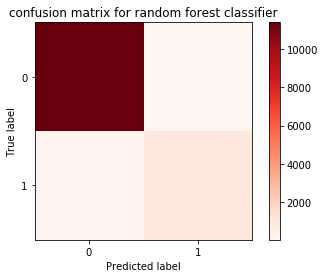

In [15]:
#confusion matrix for random forest classifier

cm = metrics.confusion_matrix(train_y, y_pred_rfc)
print(cm)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.title('confusion matrix for random forest classifier')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [22]:
true_negative, false_positive, false_negative, true_positive = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print('true_negative: %d, false_positive: %d, false_negative: %d, true_positive: %d' 
      %(true_negative, false_positive, false_negative, true_positive))

true_negative: 11382, false_positive: 50, false_negative: 181, true_positive: 915


In [26]:
precision = true_positive/(true_positive+false_positive)
print('Precision: %f' %precision)

Precision: 0.948187


In [27]:
recall = true_positive/(true_positive+false_negative)
print('Recall: %f' %recall)

Recall: 0.834854


In [28]:
f1_score = (2*precision*recall)/(precision+recall)
print('f1 score: %f' %((2*precision*recall)/(precision+recall)))

f1 score: 0.887918


Area under roc curve: 0.915240


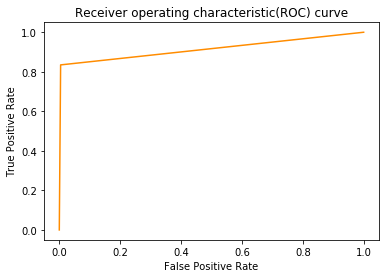

In [29]:
fpr, tpr, threshold = metrics.roc_curve(train_y, y_pred_rfc)
roc_area = metrics.auc(fpr, tpr)
print('Area under roc curve: %f' %roc_area)

plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) curve')
plt.show()

#### Testing phase:

In [157]:
ytest_pred_rfc = clf.predict(test_x)
print(ytest_pred_rfc)

[0 0 0 ... 0 0 0]


In [49]:
print('Test accuracy score: %f' %(metrics.accuracy_score(test_y,clf.predict(test_x)) * 100.00))

Test accuracy score: 97.802607


### Decision Tree classifier:

#### Training phase:

In [161]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf = clf.fit(train_x, train_y)

tree.export_graphviz(clf, out_file="graph.dot")

In [31]:
from subprocess import call
call(['dot', '-Tpng', 'graph.dot', '-o', 'graph.png', '-Gdpi=600'])

0

In [32]:
y_pred_dtc = clf.predict(train_x)
print(y_pred_dtc)

[1 0 0 ... 0 0 0]


#### Metrics for Performance Measure:

In [33]:
print('Training accuracy score: %f' %(clf.score(train_x,train_y) * 100.00))

Training accuracy score: 98.475415


[[11373    59]
 [  132   964]]


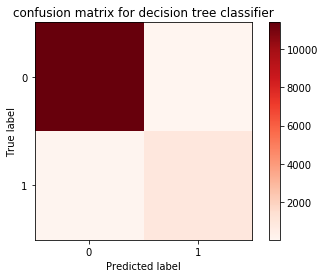

In [34]:
#confusion matrix for random forest classifier

cm = metrics.confusion_matrix(train_y, y_pred_dtc)
print(cm)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.title('confusion matrix for decision tree classifier')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [35]:
true_negative, false_positive, false_negative, true_positive = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print('true_negative: %d, false_positive: %d, false_negative: %d, true_positive: %d' 
      %(true_negative, false_positive, false_negative, true_positive))

true_negative: 11373, false_positive: 59, false_negative: 132, true_positive: 964


In [36]:
precision = true_positive/(true_positive+false_positive)
print('Precision: %f' %precision)

Precision: 0.942326


In [37]:
recall = true_positive/(true_positive+false_negative)
print('Recall: %f' %recall)

Recall: 0.879562


In [38]:
f1_score = (2*precision*recall)/(precision+recall)
print('f1 score: %f' %((2*precision*recall)/(precision+recall)))

f1 score: 0.909863


Area under roc curve: 0.937201


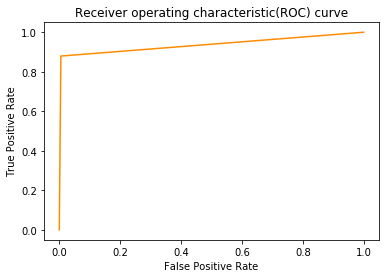

In [40]:
fpr, tpr, threshold = metrics.roc_curve(train_y, y_pred_dtc)
roc_area = metrics.auc(fpr, tpr)
print('Area under roc curve: %f' %roc_area)

plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) curve')
plt.show()

#### Testing phase:

In [162]:
ytest_pred_dtc = clf.predict(test_x)
print(ytest_pred_dtc)

[0 0 0 ... 0 0 0]


In [54]:
print('Test accuracy score: %f' %(metrics.accuracy_score(test_y,clf.predict(test_x)) * 100.00))

Test accuracy score: 97.597765


### Logistic Regression:

#### Training phase:

##### without sklearn library:

In [127]:
train_x = np.array(train_x)
train_y = np.array(train_y)

# initial vector weight with all zeros
W = np.zeros(shape=(train_x.shape[1]))
# initializing step value
step = 0.01
lamda = 0

for iter_count in range(50):
    # Gradient vector weight initialized with all zeros
    G = np.zeros(shape=(train_x.shape[1]))
    for i in range(train_x.shape[0]):
        dot_product = np.sum(W * train_x[i,:])
        p_i = 1/(1+np.exp(-1*dot_product)) - lamda * 2 *(np.sum(W))
        error_i = train_y[i] - p_i
        for j in range(train_x.shape[1]):
            G[j] = G[j] + (error_i * train_x[i,j])
    W = W + (step * G)

C:\Users\manog\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [128]:
# calculating accuracy
y_pred = np.zeros(shape=(train_y.shape[0]))
for i in range(train_x.shape[0]):
    # predicting based on W
    if 1/(1+np.exp(-np.sum(W*train_x[i,:]))) >= 0.5:
        # it is 1
        y_pred[i] = 1
    else:
        # it is 0
        y_pred[i] = 0

train_acc = np.sum(train_y == y_pred)/y_pred.shape[0] * 100.00
print('Training accuracy score: %f' %train_acc)

Training accuracy score: 96.527778


C:\Users\manog\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


##### with sklearn library:

In [165]:
clf = LogisticRegression(penalty='l1', random_state=0, max_iter=50, solver='liblinear')
clf = clf.fit(train_x, train_y)

In [131]:
y_pred_lr = clf.predict(train_x)
print(y_pred_lr)

[1 0 0 ... 0 0 0]


#### Metrics for Performance Measure:

In [132]:
print('Training accuracy score: %f' %(clf.score(train_x,train_y) * 100.00))

Training accuracy score: 98.132184


[[11375    57]
 [  177   919]]


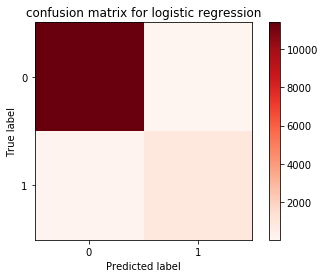

In [133]:
#confusion matrix for logistic regression

cm = metrics.confusion_matrix(train_y, y_pred_lr)
print(cm)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.title('confusion matrix for logistic regression')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [134]:
true_negative, false_positive, false_negative, true_positive = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print('true_negative: %d, false_positive: %d, false_negative: %d, true_positive: %d' 
      %(true_negative, false_positive, false_negative, true_positive))

true_negative: 11375, false_positive: 57, false_negative: 177, true_positive: 919


In [135]:
precision = true_positive/(true_positive+false_positive)
print('Precision: %f' %precision)

Precision: 0.941598


In [136]:
recall = true_positive/(true_positive+false_negative)
print('Recall: %f' %recall)

Recall: 0.838504


In [137]:
f1_score = (2*precision*recall)/(precision+recall)
print('f1 score: %f' %((2*precision*recall)/(precision+recall)))

f1 score: 0.887066


Area under roc curve: 0.916759


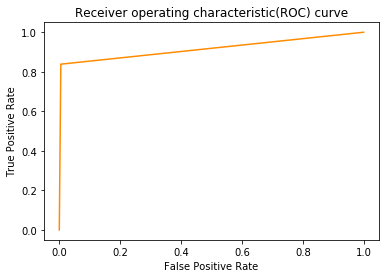

In [138]:
fpr, tpr, threshold = metrics.roc_curve(train_y, y_pred_lr)
roc_area = metrics.auc(fpr, tpr)
print('Area under roc curve: %f' %roc_area)

plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) curve')
plt.show()

#### Testing phase:

##### without sklearn library:

In [129]:
test_x = np.array(test_x)
test_y = np.array(test_y)

# calculating accuracy
y_pred = np.zeros(shape=(test_y.shape[0]))
for i in range(test_x.shape[0]):
    # predicting based on W
    if 1/(1+np.exp(-np.sum(W*test_x[i,:]))) >= 0.5:
        # it is 1
        y_pred[i] = 1
    else:
        # it is 0
        y_pred[i] = 0

test_acc = np.sum(test_y == y_pred)/y_pred.shape[0] * 100.00
print('Test accuracy score: %f' %test_acc)

Test accuracy score: 95.605214


C:\Users\manog\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


##### with sklearn library:

In [166]:
ytest_pred_lr = clf.predict(test_x)
print(ytest_pred_lr)

[0 0 0 ... 0 0 0]


In [139]:
print('Test accuracy score: %f' %(metrics.accuracy_score(test_y,clf.predict(test_x)) * 100.00))

Test accuracy score: 97.318436


### SVM:

#### Training phase:

##### without sklearn library:

In [56]:
def svm(x, y, epoch):    #The function that implements the SVM algorithms
    new_y = np.copy(y)
    new_y[new_y == 0] = -1      #Changing the label of 0 to -1
    bias = np.ones((x.shape[0], 1))*-1
    x_b = np.hstack((x,bias))   #Adding the bias
    w = np.zeros((x_b.shape[1]))
    l_r = 0.01     #Learning rate

    for ep in range(epoch):     #Starting with 1 to avoid division by zero error inside the loop
        for i, x in enumerate(x_b):
            val = np.dot(x_b[i], w) 
            if (new_y[i]*val) < 1:
                w = w + l_r * ((x_b[i]*new_y[i]) - (2 * (1/(ep+1)) * w))    #Keeping the hyper-parameter as (1/epoch)
            else:
                w = w - l_r * (2 * (1/(ep+1)) * w)
    
    return w    #Returning the obtained weight vector

def svm_predict(x, w):   #This function does the dot product and returns the prediction as whether +1 or -1
    f_w = w[0:int(w.shape[0]-1)]
    b_w = w[int(w.shape[0]-1)]
    pred_y = np.sign(np.dot(x,f_w) - b_w)   #np.sign would return +1 for > 0 and -1 for < 0
    return pred_y

def train(x, y, w):    #This function tests the weight vector against the training data
    new_y = np.copy(y)
    new_y[new_y == 0] = -1
    pred_label = np.zeros((x.shape[0]))
    for i in range(x.shape[0]):
        pred_label[i] = svm_predict(x[i], w)
    
    correct = 0
    incorrect = 0
    
    for j in range(pred_label.shape[0]):        
        if pred_label[j] == new_y[j]:
            correct += 1
        else:
            incorrect += 1
    
    accuracy = (correct/y.shape[0]) * 100.00     #Calculating the percentage of accuracy
    return accuracy

In [57]:
train_x = np.array(train_x)
train_y = np.array(train_y)

weight = svm(train_x, train_y, 200)
train_acc = train(train_x, train_y, weight)
print('Training accuracy score: %f' %train_acc)

Training accuracy score: 96.583653


##### with sklearn library:

In [169]:
clf = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, random_state=0, max_iter=200)
clf = clf.fit(train_x, train_y)

In [141]:
y_pred_svm = clf.predict(train_x)
print(y_pred_svm)

[1 0 0 ... 0 0 0]


#### Metrics for Performance Measure:

In [142]:
print('Training accuracy score: %f' %(clf.score(train_x,train_y) * 100.00))

Training accuracy score: 98.036398


[[11379    53]
 [  193   903]]


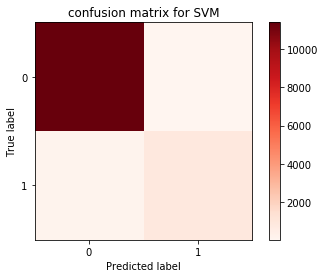

In [143]:
#confusion matrix for SVM

cm = metrics.confusion_matrix(train_y, y_pred_svm)
print(cm)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.title('confusion matrix for SVM')
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [144]:
true_negative, false_positive, false_negative, true_positive = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print('true_negative: %d, false_positive: %d, false_negative: %d, true_positive: %d' 
      %(true_negative, false_positive, false_negative, true_positive))

true_negative: 11379, false_positive: 53, false_negative: 193, true_positive: 903


In [145]:
precision = true_positive/(true_positive+false_positive)
print('Precision: %f' %precision)

Precision: 0.944561


In [146]:
recall = true_positive/(true_positive+false_negative)
print('Recall: %f' %recall)

Recall: 0.823905


In [147]:
f1_score = (2*precision*recall)/(precision+recall)
print('f1 score: %f' %((2*precision*recall)/(precision+recall)))

f1 score: 0.880117


Area under roc curve: 0.909635


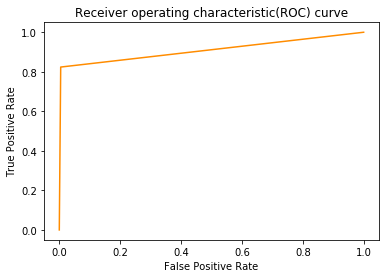

In [148]:
fpr, tpr, threshold = metrics.roc_curve(train_y, y_pred_svm)
roc_area = metrics.auc(fpr, tpr)
print('Area under roc curve: %f' %roc_area)

plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) curve')
plt.show()

#### Testing phase:

##### without sklearn library:

In [58]:
def test(x, y, w):    #This function tests the weight vector against the testing data
    new_y = np.copy(y)
    new_y[new_y == 0] = -1
    pred_label = np.zeros((x.shape[0]))
    for i in range(x.shape[0]):
        pred_label[i] = svm_predict(x[i], w)
    
    correct = 0
    incorrect = 0
    
    for j in range(pred_label.shape[0]):        
        if pred_label[j] == new_y[j]:
            correct += 1
        else:
            incorrect += 1
    
    accuracy = (correct/y.shape[0]) * 100.00     #Calculating the percentage of accuracy
    return accuracy

In [59]:
test_x = np.array(test_x)
test_y = np.array(test_y)

test_acc = test(test_x, test_y, weight)
print('Test accuracy score: %f' %test_acc)

Training accuracy score: 95.716946


##### with sklearn library:

In [170]:
ytest_pred_svm = clf.predict(test_x)
print(ytest_pred_svm)

[0 0 0 ... 0 0 0]


In [149]:
print('Test accuracy score: %f' %(metrics.accuracy_score(test_y,clf.predict(test_x)) * 100.00))

Test accuracy score: 97.169460


### Classification Report of each of the 4 classifiers:

#### Random Forest classifier:

In [155]:
metrics.accuracy_score(train_y, y_pred_rfc)

0.9815613026819924

In [158]:
metrics.accuracy_score(test_y, ytest_pred_rfc)

0.972998137802607

In [151]:
print(metrics.classification_report(train_y, y_pred_rfc, labels = [0, 1]))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     11432
          1       0.95      0.83      0.89      1096

avg / total       0.98      0.98      0.98     12528



#### Decision Tree classifier:

In [159]:
metrics.accuracy_score(train_y, y_pred_dtc)

0.9847541507024266

In [163]:
metrics.accuracy_score(test_y, ytest_pred_dtc)

0.9718808193668529

In [152]:
print(metrics.classification_report(train_y, y_pred_dtc, labels = [0, 1]))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     11432
          1       0.94      0.88      0.91      1096

avg / total       0.98      0.98      0.98     12528



#### Logistic Regression:

In [164]:
metrics.accuracy_score(train_y, y_pred_lr)

0.9813218390804598

In [167]:
metrics.accuracy_score(test_y, ytest_pred_lr)

0.9731843575418995

In [153]:
print(metrics.classification_report(train_y, y_pred_lr, labels = [0, 1]))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     11432
          1       0.94      0.84      0.89      1096

avg / total       0.98      0.98      0.98     12528



#### SVM:

In [168]:
metrics.accuracy_score(train_y, y_pred_svm)

0.9803639846743295

In [171]:
metrics.accuracy_score(test_y, ytest_pred_svm)

0.9716945996275606

In [154]:
print(metrics.classification_report(train_y, y_pred_svm, labels = [0, 1]))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     11432
          1       0.94      0.82      0.88      1096

avg / total       0.98      0.98      0.98     12528

